In [4]:
!pip install yfinance
!pip install pandas==2.0
!pip install requests
!pip install bs4
!pip install plotly

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tesla = yf.Ticker('TSLA')


In [8]:
tesla_data = tesla.history(period="14y")


In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-10-25 00:00:00-04:00,1.396000,1.398667,1.382000,1.390000,1777500,0.0,0.0
1,2010-10-26 00:00:00-04:00,1.386667,1.458000,1.367333,1.424000,9913500,0.0,0.0
2,2010-10-27 00:00:00-04:00,1.416667,1.425333,1.376667,1.400000,5347500,0.0,0.0
3,2010-10-28 00:00:00-04:00,1.426000,1.433333,1.397333,1.412667,3363000,0.0,0.0
4,2010-10-29 00:00:00-04:00,1.409333,1.456667,1.403333,1.456000,4209000,0.0,0.0


In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text


In [11]:
soup = BeautifulSoup(html_data)


In [23]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                
                # Concatenate using a DataFrame created from a single-row dictionary
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [25]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/349343550.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [27]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [29]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [31]:
GameStop = yf.Ticker("GME")

In [33]:
gme_data = GameStop.history(period='2y')

In [37]:
gme_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-24 00:00:00-04:00,25.000000,25.190001,24.110001,24.709999,3114300,0.0,0.0
2022-10-25 00:00:00-04:00,24.820000,27.790001,24.799999,26.870001,7791600,0.0,0.0
2022-10-26 00:00:00-04:00,26.370001,27.480000,25.320000,25.420000,3858200,0.0,0.0
2022-10-27 00:00:00-04:00,25.750000,26.330000,25.200001,25.930000,2422900,0.0,0.0
2022-10-28 00:00:00-04:00,26.879999,28.790001,26.420000,28.170000,8089600,0.0,0.0


In [41]:
gme_data.reset_index(inplace=True)

In [43]:
url = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

In [45]:
html_data_2  = requests.get(url).text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [47]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [69]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                
                # Concatenate using a DataFrame created from a single-row dictionary
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [71]:
gme_revenue.columns = ['Date', 'Revenue']

In [73]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/1851095557.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [75]:
print(gme_revenue)

          Date  Revenue
0   2020-04-30   1021.0
1   2020-01-31   2194.0
2   2019-10-31   1439.0
3   2019-07-31   1286.0
4   2019-04-30   1548.0
..         ...      ...
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0

[62 rows x 2 columns]


In [77]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [79]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


In [81]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



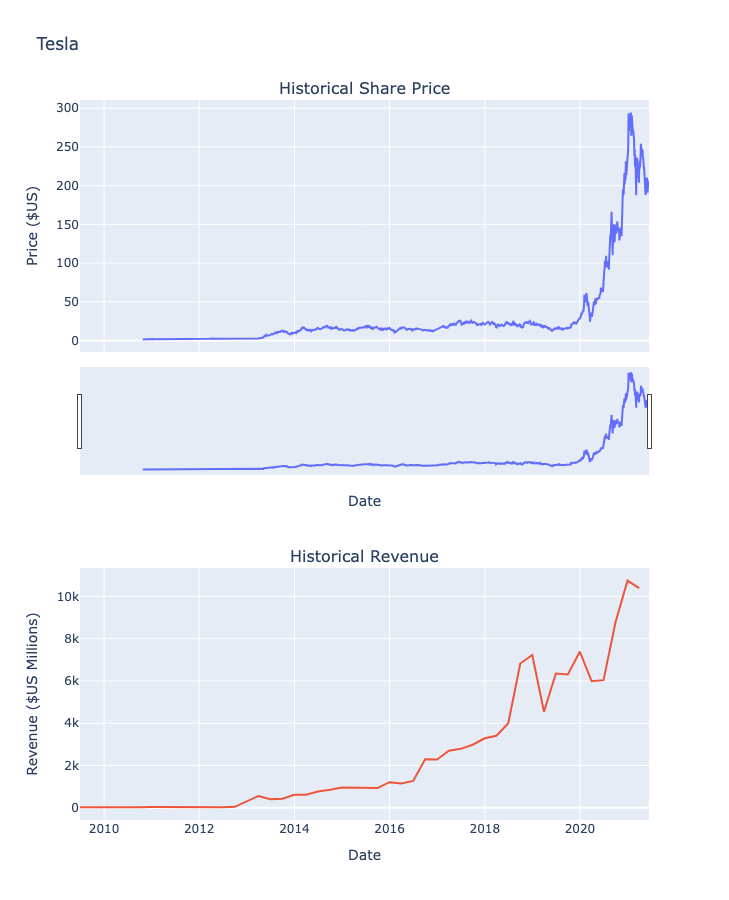

In [83]:
make_graph(tesla_data,tesla_revenue,'Tesla')

/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/yp/zxxdlmjd6dg2dd4rgmclsv1c0000gn/T/ipykernel_40410/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



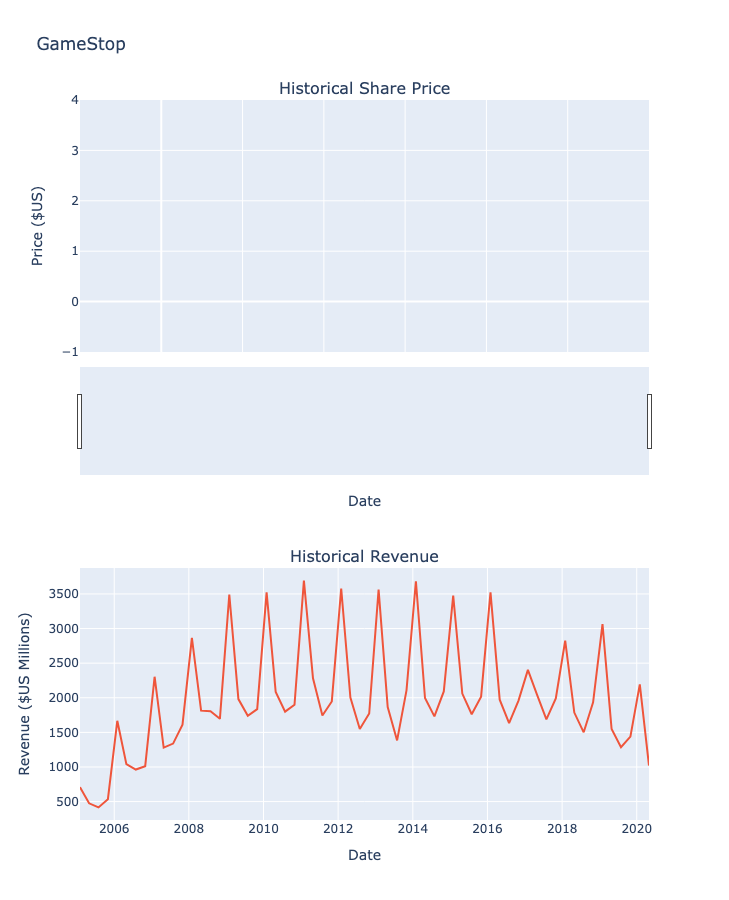

In [85]:
make_graph(gme_data, gme_revenue, 'GameStop')